# 0.) Import the Credit Card Fraud Data From CCLE

In [33]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

NameError: name 'drive' is not defined

In [34]:
df = pd.read_csv("fraudTest.csv")

In [35]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [36]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/y4/kyqq3t8x46d0p0lk1_9h9wz00000gn/T/ipykernel_50859/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/y4/kyqq3t8x46d0p0lk1_9h9wz00000gn/T/ipykernel_50859/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [39]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [40]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_holdout = pd.DataFrame(scaler.transform(X_holdout),columns=X_holdout.columns)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [41]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [42]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [45]:
over_log.score(X_test, y_test)

0.9194318481729408

In [46]:
under_log.score(X_test, y_test)

0.919011972456153

In [47]:
smote_log.score(X_test, y_test)

0.9143093644281293

In [ ]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [ ]:
# Sensitivity here in credit fraud is more important as seen from last class

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
y_true = y_test

In [50]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76414,  6641],
       [   75,   228]])

In [51]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7524752475247525


In [52]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76378,  6677],
       [   74,   229]])

In [53]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7557755775577558


In [54]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75987,  7068],
       [   75,   228]])

In [55]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7524752475247525


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [56]:
raw_temp = pd.concat([X_train, y_train], axis =1)

In [57]:
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

raw_temp = pd.concat([X_train_df, y_train_df], axis=1)
raw_temp.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud
0,-0.385027,-0.055221,-1.589069,-0.278536,-0.276301,-0.335508,-0.190437,-0.32378,-0.264888,-0.322650,-0.309508,4.394227,-0.257123,-0.277125,-0.285495,-0.313437,-0.179907,0.0
1,0.038069,-0.290408,-0.375294,-0.278536,-0.276301,-0.335508,-0.190437,-0.32378,-0.264888,3.099338,-0.309508,-0.227571,-0.257123,-0.277125,-0.285495,-0.313437,-0.179907,0.0
2,-0.003014,-0.291335,0.838481,3.590194,-0.276301,-0.335508,-0.190437,-0.32378,-0.264888,-0.322650,-0.309508,-0.227571,-0.257123,-0.277125,-0.285495,-0.313437,-0.179907,NaN
3,-0.002890,-0.230059,0.838481,-0.278536,-0.276301,2.980555,-0.190437,-0.32378,-0.264888,-0.322650,-0.309508,-0.227571,-0.257123,-0.277125,-0.285495,-0.313437,-0.179907,0.0
4,-0.129875,-0.288106,-1.126678,-0.278536,-0.276301,-0.335508,-0.190437,-0.32378,-0.264888,-0.322650,3.230930,-0.227571,-0.257123,-0.277125,-0.285495,-0.313437,-0.179907,NaN


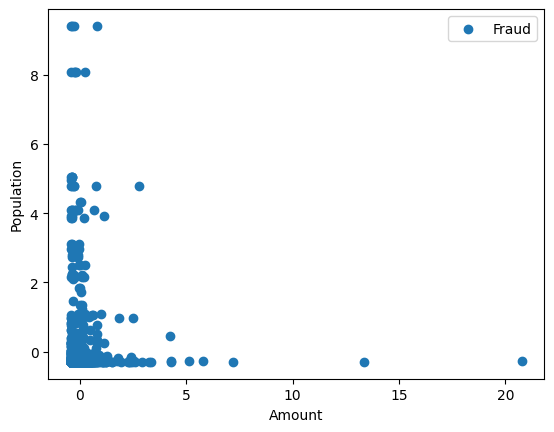

In [58]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [59]:

raw_temp = pd.concat([smote_X, smote_y], axis =1)


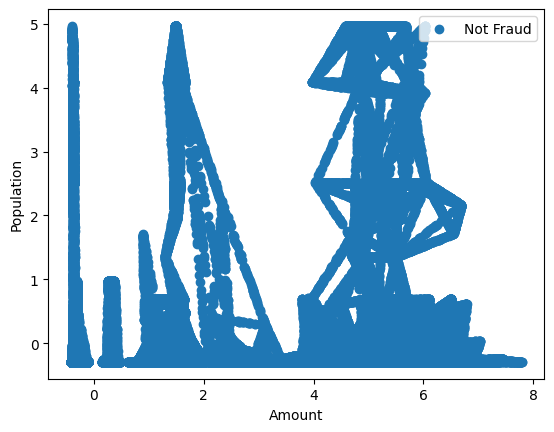

In [60]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [62]:
from sklearn.linear_model import LogisticRegression

# To use the liblinear solver, you can specify it when creating the LogisticRegression instance
from sklearn.linear_model import LogisticRegression

In [63]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [64]:
resampling_methods = {
    'over' : RandomOverSampler,
    'under' : RandomUnderSampler,
    'smote' : SMOTE
    
}
   
model_configs = {
    'LOG' : LogisticRegression(),
    "LASSO" : LogisticRegression(penalty="l1",C=2.,solver="liblinear"),
    'DTREE' : DecisionTreeClassifier()
    
}
   

In [67]:
resampling_methods={
    "over": RandomOverSampler(),
    "under": RandomUnderSampler(),
    "smote": SMOTE(),   
}

model_configs={
    "LOG" : LogisticRegression(),
    "LASSO" : LogisticRegression(penalty="l1",C=2.,solver="liblinear"),
    "DTREE" : DecisionTreeClassifier()
}

In [71]:
trained_models = {}
results = []

In [69]:
def calc_perf_metric(y_true, y_pred):
    tn, fp, fn, tp=confusion_matrix(y_true, y_pred).ravel()
    
    sensitivity=tp/(tp+fn)
    specificity=tn/(tn+fp)
    precision= precision_score(y_true, y_pred)
    recall=recall_score(y_true, y_pred)
    f1=f1_score(y_true, y_pred)
    
    return(sensitivity,specificity, precision, recall, f1)

In [72]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y=resampler.fit_resample(X_train,y_train)
    
    for model_key, model in model_configs.items():
        combined_key=f"{resample_key}_{model_key}"
        
        m=model.fit(resample_X,resample_y)
        
        trained_models[combined_key]=m
        y_pred=m.predict(X_test)
        
        sensitivity, specificity, precision, recall, f1= calc_perf_metric(y_true, y_pred)
        
        results.append({"Model":combined_key,
                       "Sensitivity": sensitivity,
                       "Specificity": specificity,
                       "Precision": precision,
                       "Recall": recall,
                       "F1":f1})

In [73]:
results=pd.DataFrame(results)
results

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.755776,0.919379,0.033069,0.755776,0.063365
1,over_LASSO,0.755776,0.919403,0.033078,0.755776,0.063382
2,over_DTREE,0.574257,0.998591,0.597938,0.574257,0.585859
3,under_LOG,0.752475,0.927084,0.036283,0.752475,0.069227
4,under_LASSO,0.752475,0.926880,0.036185,0.752475,0.069049
5,under_DTREE,0.976898,0.951514,0.068471,0.976898,0.127972
6,smote_LOG,0.755776,0.916730,0.032050,0.755776,0.061493
7,smote_LASSO,0.755776,0.916742,0.032055,0.755776,0.061501
8,smote_DTREE,0.732673,0.992896,0.273399,0.732673,0.398206
